## Playing around with singlet-triplet Hamiltonian

In [1]:
%matplotlib inline

In [2]:
%qtconsole

In [77]:
run donors.py

In [78]:
singlet_triplet1 = DonorSingletTriplet()

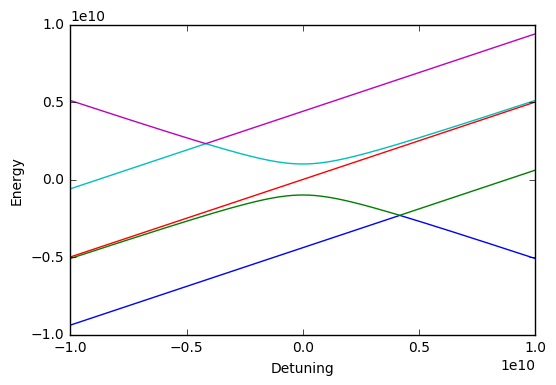

In [24]:
singlet_triplet1.plot_spectrum_vs_detuning(-10e9,10e9,b_z=0.05)

In [73]:
output, times = singlet_triplet1.do_detuning_pulse(start=-0.5e9, stop=0.5e9, psi0=qu.basis(5,0), ramp_time=10e-9)

In [74]:
S20_overlap = np.zeros(len(times))
for ind,val in enumerate(output.states):
    S20_overlap[ind] = np.abs(val.overlap(qu.basis(5,4)))**2

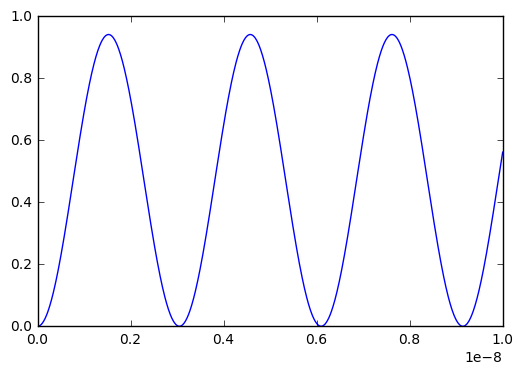

In [75]:
plt.plot(times, S20_overlap)
plt.show(block=False)

In [71]:
test_H = singlet_triplet1.build_full_hamiltonian(detuning=0.1e9)

In [58]:
vals, vecs = test_H.eigenstates()

In [100]:
detuning = np.linspace(-50e9,50e9,1000)
eigen_vals = np.zeros((len(detuning),8))

In [109]:
for ind,val in enumerate(detuning):
    H_matrix = singlet_triplet1.build_full_hamiltonian(b_z=0.05, dBz=400e6, tc1=0.5e9, tc2=0.3e9, detuning=val, 
                                                       pauli_energy=40e9)
    eigen_vals[ind], vecs = H_matrix.eigenstates()

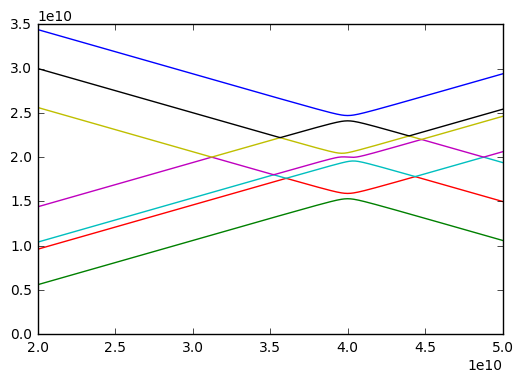

In [110]:
plt.plot(detuning, eigen_vals)
plt.ylim(0,35e9)
plt.xlim(20e9,50e9)
plt.show()